<a href="https://colab.research.google.com/github/dniggl/Insights/blob/main/Predict_Insurance_Claims_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predict insurance claim charges based on the characteristics of the policy holders.  

In [3]:
# Import required software libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [4]:
#Load the data on Google Colab 
from google.colab import files  # Use to load data on Google Colab 
uploaded = files.upload()      

Saving insurance.csv to insurance.csv


In [5]:
# Import the data set into a dataframe.
insurance = pd.read_csv('insurance.csv')

**Data Analysis**

In [6]:
# Print the first 5 rows.
insurance.head()  

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


This dataset was found on Kaggle and can be accessed at this link https://www.kaggle.com/mirichoi0218/insurance. The data set was based on Miri Choi's Medical Cost Personal Datasets. 

The columns and definitions are described below.

1. age - age of the policy holder.

2. sex - gender of policy holder (female, male).

3. bmi - Body mass index, providing an understanding of the body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 25.

4. children - number of children/dependents of the policy holder.

5. smoker - smoking status of policy holder (non-smoker=no, smoker=yes).

6. region - the residential area of the policy holder in the US (northeast, northwest, southeast and southwest).

7. charges - individual medical costs billed by health insurance (US Dollars).

In [7]:
# Show information about the data columns.
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Summary:
*   There are 1,338 insurance records with 7 variables.
*   The data set does not have any null or missing values.
*   There are categorical and numerical data types.

In [8]:
# Show statistics on the data frame.
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Observations:
*   The average age is 39 years.
*   The average body mass index is 30.66.
*   The average number of children is 1.
*   The average claims charge was $13,270.

Text(0, 0.5, 'Claim Charges ($)')

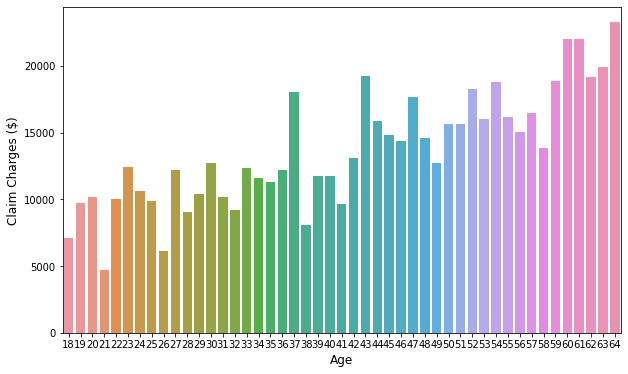

In [9]:
# Visualize the relationship between age and claim charges. 
fig = plt.figure(figsize = (10, 6))
sns.barplot(y = 'charges', 
            x = 'age', 
            data = insurance,
            ci = None)

# set labels
plt.xlabel("Age", size=12)
plt.ylabel("Claim Charges ($)", size=12)



Text(0, 0.5, 'Claim Charges ($)')

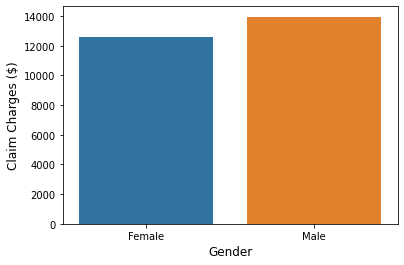

In [10]:
# Visualize the relationship between gender and claim charges. 
fig = plt.figure(figsize = (6,4))
sns.barplot(y = 'charges', 
            x = 'sex', 
            data = insurance,
            ci = None)
plt.xticks(ticks=[0, 1], labels = ["Female", "Male"])

# set labels
plt.xlabel("Gender", size=12)
plt.ylabel("Claim Charges ($)", size=12)

In [11]:
# Check the body mass index column for variances in the values.
min(insurance.bmi), max(insurance.bmi)

(15.96, 53.13)

There is a broad range of variances in body mass index (bmi) values. In order to visualize data for this feature, we will need to add a new bmi class variable and create groups with specific bmi values.  

In [12]:
# Add a new column for bmi class and round the numbers.
insurance["bmiclass"] = insurance.bmi
insurance.bmiclass = insurance.bmi.round()
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges,bmiclass
0,19,female,27.900,0,yes,southwest,16884.92400,28.0
1,18,male,33.770,1,no,southeast,1725.55230,34.0
2,28,male,33.000,3,no,southeast,4449.46200,33.0
3,33,male,22.705,0,no,northwest,21984.47061,23.0
4,32,male,28.880,0,no,northwest,3866.85520,29.0


In [13]:
# Create separate groups based on bmi values. 
insurance['bmiclass'] = insurance['bmiclass'].replace([16, 17, 18, 19, 20, 21], 1)
insurance['bmiclass'] = insurance['bmiclass'].replace([22, 23, 24, 25, 26, 27], 2)
insurance['bmiclass'] = insurance['bmiclass'].replace([28, 29, 30, 31, 32, 33], 3)
insurance['bmiclass'] = insurance['bmiclass'].replace([34, 35, 36, 37, 38, 39], 4)
insurance['bmiclass'] = insurance['bmiclass'].replace([40, 41, 42, 43, 44, 45], 5)
insurance['bmiclass'] = insurance['bmiclass'].replace([46, 47, 48, 49, 50, 51, 52, 53], 6)
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges,bmiclass
0,19,female,27.900,0,yes,southwest,16884.92400,3.0
1,18,male,33.770,1,no,southeast,1725.55230,4.0
2,28,male,33.000,3,no,southeast,4449.46200,3.0
3,33,male,22.705,0,no,northwest,21984.47061,2.0
4,32,male,28.880,0,no,northwest,3866.85520,3.0


Text(0, 0.5, 'Claim Charges ($)')

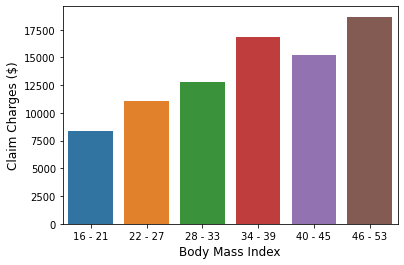

In [14]:
# Visualize the relationship between body mass index and amount of claim charges. 
fig = plt.figure(figsize = (6,4))
sns.barplot(y = 'charges', 
            x = 'bmiclass', 
            data = insurance,
            ci = None)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels = ["16 - 21", "22 - 27", "28 - 33", "34 - 39", "40 - 45", "46 - 53"]) 
# set labels

plt.xlabel("Body Mass Index", size=12)
plt.ylabel("Claim Charges ($)", size=12)

Text(0, 0.5, 'Claim Charges ($)')

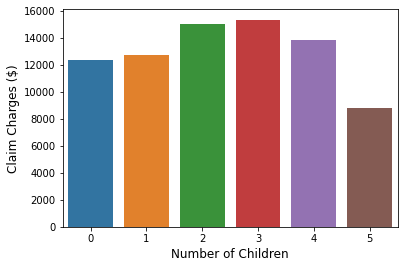

In [15]:
# Visualize the relationship between number of children and amount of claim charges. 
fig = plt.figure(figsize = (6,4))
sns.barplot(y = 'charges', 
            x = 'children', 
            data = insurance,
            ci = None)

# set labels
plt.xlabel("Number of Children", size=12)
plt.ylabel("Claim Charges ($)", size=12)

Text(0, 0.5, 'Claim Charges ($)')

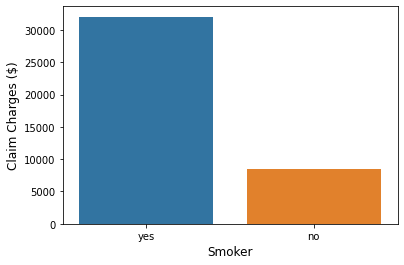

In [16]:
# Visualize the relationship between smoker/non-smoker and amount of claim charges. 
fig = plt.figure(figsize = (6,4))
sns.barplot(y = 'charges', 
            x = 'smoker', 
            data = insurance,
            ci = None)
 
# set labels
plt.xlabel("Smoker", size=12)
plt.ylabel("Claim Charges ($)", size=12)

Text(0, 0.5, 'Claim Charges ($)')

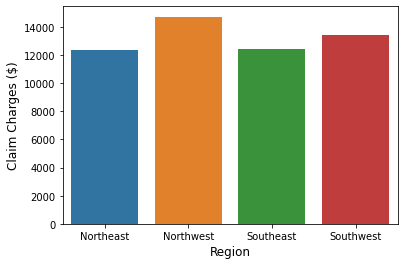

In [17]:
# Visualize the relationship between region and amount of claim charges. 
fig = plt.figure(figsize = (6,4))
sns.barplot(y = 'charges', 
            x = 'region', 
            data = insurance,
            ci = None)
plt.xticks(ticks=[0, 1, 2, 3], labels = ["Northeast", "Northwest", "Southeast", "Southwest"]) 

# set labels
plt.xlabel("Region", size=12)
plt.ylabel("Claim Charges ($)", size=12)

Observations:

* As age increases there is a gradual increase in claim charges.  
* Claim charges are slightly higher for males.  
* As body mass index increases there is an increase in claim charges. It is interesting that claim charges decrease slightly in the 40 - 45 bmi group.   
* Claim charges are higher when there are 2 or 3 children under the policy.     
* Claim charges are significantly higher among smokers.
* Claim charges are similiar across all regions with Northwest showing the highest charges.

In [18]:
# Check the charges column for variances in the values.
min(insurance.charges), max(insurance.charges)

(1121.8739, 63770.42801)

There is a broad range of variances in the values for the charges variable.

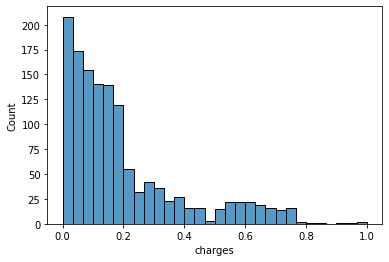

In [40]:
# Visualize the distribution of claim charges.  
plt.figure(figsize=(6, 4))
sns.histplot(insurance['charges'])

The charges values are skewed to the right side of the axis. We will use min and max scaling in sklearn to normalize the charges. This will convert the charges values to a range between 0 and 1, which will make it easier for the data to be processed in the models.

In [20]:
# We will use min and max scaling in sklearn to normalize the charges.
column = 'charges'
insurance[column] = (insurance[column] - insurance[column].min()) / (insurance[column].max() - insurance[column].min())
insurance.head()

,age,sex,bmi,children,smoker,region,charges,bmiclass
0,19,female,27.900,0,yes,southwest,0.251611,3.0
1,18,male,33.770,1,no,southeast,0.009636,4.0
2,28,male,33.000,3,no,southeast,0.053115,3.0
3,33,male,22.705,0,no,northwest,0.333010,2.0
4,32,male,28.880,0,no,northwest,0.043816,3.0


**Feature Selection**

We need to convert categorical data into numerical data. We will use the one hot encoding for this conversion. One hot encoding is a technique where we replace the categorical data with binary digits. The converted column is given a number corresponding to the values. 

In [21]:
# Use label encoder to convert sex, smoker and region columns to numeric values.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
insurance["sex"] = le.fit_transform(insurance["sex"])       # 0 = female, 1 = male
insurance["smoker"] = le.fit_transform(insurance["smoker"]) # 1 = smoker, 2 = non-smoker
insurance["region"] = le.fit_transform(insurance["region"]) # 1 = northwest, 2 = southeast, 3 = southwest, 4 = northeast

In [22]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges,bmiclass
0,19,0,27.900,0,1,3,0.251611,3.0
1,18,1,33.770,1,0,2,0.009636,4.0
2,28,1,33.000,3,0,2,0.053115,3.0
3,33,1,22.705,0,0,1,0.333010,2.0
4,32,1,28.880,0,0,1,0.043816,3.0


We will use Pearson Correlation method to construct a correlation matrix that measures the linear association between features and target variables. 

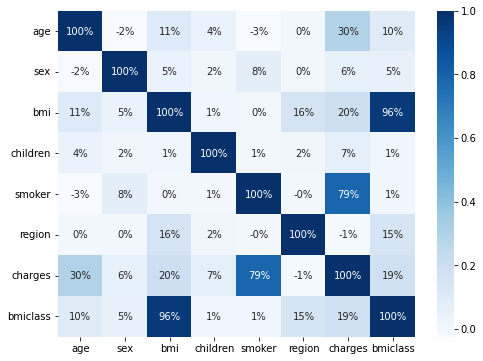

In [23]:
# Visualize the correlations between features and the target variable in a heat map.
plt.figure(figsize=(8,6))  
sns.heatmap(insurance.corr(), annot=True, fmt='.0%', cmap='Blues')

Observations:

* There is a strong correlation between smoker and charges.  
* There is a weak correlation between age and charges  
* There is a weak correlation between BMI and charges.  

In [24]:
# Remove sex and region features because they provide minimal value for this analysis.
# Remove bmiclass feature because bmi is already represented in the data set.
insurance.drop(['sex', 'region', 'bmiclass'], axis=1, inplace=True)

In [25]:
insurance.head()

,age,bmi,children,smoker,charges
0,19,27.900,0,1,0.251611
1,18,33.770,1,0,0.009636
2,28,33.000,3,0,0.053115
3,33,22.705,0,0,0.333010
4,32,28.880,0,0,0.043816


**Split the Data into Training and Test Data Sets**

In [ ]:
# Create features and target data sets.  
# Features data will include all of the data columns except for the charges column.
# Target data will include only the charges column.
x_data = insurance.drop('charges', axis = 1)
y_data = insurance['charges']

In [27]:
# Use train_test_split function to generate training data and test data. Test data set will be 25% of original data set. 
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.25, random_state=42)


**Normalize the Data**

We need to normalize the data so that its distribution will have a mean value 0 and standard deviation of 1. Normalization makes the features more consistent with each other, which allows the model to predict outputs more accurately. This is done for each feature or column in the data set. 

In [28]:
# Normalize the feature datasets. StandardScaler will transform the data so that its distribution 
# will have a mean value 0 and standard deviation of 1. 
sc = StandardScaler()
x_training_data = sc.fit_transform(x_training_data)
x_test_data = sc.fit_transform(x_test_data)

**We will now train models, make predictions and evaluate the performance of three different machine learning models.**

We will use Root Mean Squared Error (RMSE) to measure the performance of the models. The root mean squared error is a metric that shows the average distance between the predicted values from the model and the actual values in the dataset. RMSE is found by calculating the residual (difference between prediction and truth) for each data point, compute the norm of residual for each data point, compute the mean of residuals and take the square root of that mean. The lower the value, the better the model performs. 

**Linear Regression Model** 

Simple linear regression uses one independent variable to explain or predict the outcome of the dependent variable Y, while multiple linear regression uses two or more independent variables to predict the outcome. When creating a regression model, all that we are trying to do is draw a line that is closest to each point in a data set.

In [29]:
# Create model object. 
model_lr = LinearRegression()
# Train the model on the training data.
model_lr.fit(x_training_data, y_training_data)
# Make predictions on the test data. 
predictions_lr = model_lr.predict(x_test_data)

In [30]:
# Show the accuracy score for test data.
lr = (model_lr.score(x_test_data, y_test_data))
print (f'Accuracy: {round(lr*100,2)}%')

Accuracy: 76.57%


The linear regression model accurately predicted 77% of the insurance claim charges based on the features of the policy holder.  

In [31]:
# Show the root mean squared error (RMSE) for the linear regression model.  
rmse = np.sqrt(np.mean(((predictions_lr - y_test_data)**2)))
print(rmse)

0.0949123371964687


The RMSE shows that the linear regression model has a typical prediction error of .09, which is very good. 

**Random Forrest Model**

Random Forrest Model consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest generates a class prediction and the class with the most votes becomes the  model’s prediction. The fundamental idea behind a random forest is to combine many decision trees into a single model. Individually, predictions made by decision trees (or humans) may not be accurate, but combined together, the predictions will be far more accurate.  

In [32]:
# Create model object. 
model_rf = RandomForestRegressor(n_estimators = 10, random_state = 0)
# Train the model on the training data.
model_rf.fit(x_training_data, y_training_data)
# Make predictions on the test data. 
predictions_rf = model_rf.predict(x_test_data)

In [33]:
# Show the accuracy score for the test data.
rf = (model_rf.score(x_test_data, y_test_data))
print (f'Accuracy: {round(rf*100,2)}%')

Accuracy: 82.18%


The random forrest model accurately predicted 82% of the insurance claim charges based on the features of the policy holder.  

In [34]:
# Show the root mean squared error (RMSE) for the random forrest model.  
rmse = np.sqrt(np.mean(((predictions_rf - y_test_data)**2)))
print(rmse)

0.08277932950728627


The RMSE shows that the random forrest model has a typical prediction error of .08, which is very good. 

**Support Vector Machine Model**

Support Vector Machines (SVM) are supervised machine learning models with associated learning algorithms that analyze data and recognize patterns. Support vector machines can be used for both classification problems and regression problems. More specifically, an SVR model maps the data points as points in space and divides the separate categories so that they are divided by an open gap that is as wide as possible. New data points are predicted to belong to a category based on which side of the gap they fall into.

In [35]:
# Create model object. 
model_sv = SVR()
# Train the model on the training data.
model_sv.fit(x_training_data, y_training_data)
# Make predictions on the test data. 
predictions_sv = model_sv.predict(x_test_data)

In [36]:
# Show the accuracy score for the test data.
sv = (model_sv.score(x_test_data, y_test_data))
print (f'Accuracy: {round(sv*100,2)}%')

Accuracy: 73.95%


The support vector machine model accurately predicted 74% of the insurance claim charges based on the features of the policy holder. 

In [37]:
# Show the root mean squared error (RMSE) for the random forrest model.  
rmse = np.sqrt(np.mean(((predictions_sv - y_test_data)**2)))
print(rmse)

0.10006634144813659


The RMSE shows that the support vector machine model has a typical prediction error of .10, which is very good. 

,Model,Accuracy_score
1,Random Forrest,0.821761
0,Linear Regression,0.765683
2,Support Vector Machine,0.739544


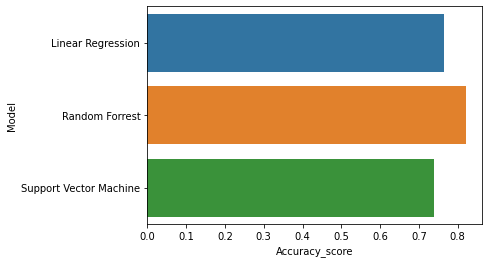

In [38]:
# Show Accuraccy Score by Model.
models = pd.DataFrame({
    'Model':['Linear Regression', 'Random Forrest', 'Support Vector Machine'],
    'Accuracy_score' :[lr, rf, sv]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)


Conclusions:                                                                  All of the models did a good job in predicting insurance claim charges based on the characteristics of the policy holders. The random forrest model had the highest accuracy score. This model correctly predicted 82% of insurance claim charges. This model also has a typical prediction error of .08. The study can be improved by having a larger insurance data set and by tweeking the models hyper-parameters.         